In [ ]:
#. Załaduj moduły: numpy i matplotlib. Dodaj linijkę powodującą wyświetlanie wykresu w bieżącym IDE, bez otwierania dodatkowego okna.
#Dodatkowo załaduj również kolejne 2 moduły:
#from sklearn.datasets.samples_generator import make_blobs
#from sklearn.cluster import KMeans
#pierwszy z nich posłuży do wygenerowania fikcyjnego zbioru danych, a drugi znasz już z lekcji

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs#data gen nowa
# from sklearn.datasets.samples_generator import make_blobs  #data gen stara


In [4]:
make_blobs

<function sklearn.datasets._samples_generator.make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)>

In [ ]:
#3. Uruchom instrukcję, która utworzy  zbiór 100 punktów, które połączą się w skupiska. Uruchamiając to polecenie z parametrem 
# random_state uzyskasz taki sam zbiór danych za każdym razem. Możesz w kolejnych wariantach tego zadania zmieniać tą wartość. 
# Tutaj będziemy korzystać tylko ze zmiennej X:

In [6]:
X, y = make_blobs(n_samples=100, centers=4, cluster_std=0.60, random_state=0)

In [ ]:
#4. Narysuj wykres obrazujący punkty o współrzędnych X. X ma dwie kolumny - zerową i pierwszą. Na osi X skorzystaj z danych w zerowej 
# kolumnie, a na osi Y z danych w pierwszej kolumnie.

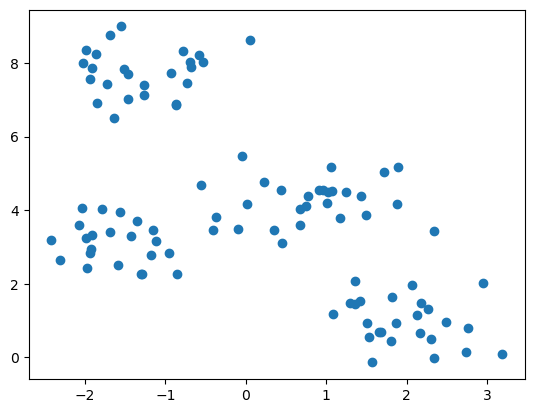

In [7]:
plt.scatter(X[:,0], X[:,1])

In [ ]:
# 5. Zadeklaruj pustą tablicę WCSS do zapamiętywania "wydajności" clustrów z różnymi ilościami centroidów

In [8]:
WCSS = []

In [ ]:
#6. W pętli generuj modele KMeans z ilością clustrów od 1 do 15. Każdorazowo ćwicz model na danych z X i dodawaj do WCSS nową wartość 
# określającą skuteczność podziału algorytmu

In [9]:
for k in range(1,15):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

In [ ]:
#for k in range(1, 15):Opis: Tworzysz pętlę for, która przechodzi przez wartości zmiennej k od 1 do 14. Wartość ta reprezentuje liczbę klastrów (grup), 
# które będą testowane w algorytmie KMeans w każdym przebiegu.
 #kmeans = KMeans(n_clusters=k, n_init='auto') Opis: Tworzysz nowy obiekt klasy KMeans, gdzie:
#n_clusters=k: liczba klastrów ustawiona na bieżącą wartość k z pętli (czyli od 1 do 14).
#n_init='auto': ta opcja automatycznie ustawia liczbę inicjalizacji centroidów na wartość zalecaną w nowszych wersjach 
#scikit-learn (domyślnie 10 w starszych wersjach). Oznacza to, że algorytm będzie uruchamiany kilka razy z różnymi 
#początkowymi wartościami, a wynik z najniższą wartością WCSS zostanie wybrany.
# kmeans.fit(X) Opis: Trenujesz algorytm KMeans na zbiorze danych X. fit() oznacza dopasowanie modelu, 
#czyli znalezienie centroidów (środków klastrów) w danych.
# WCSS.append(kmeans.inertia_) Dodajesz do listy WCSS wartość bezwładności (ang. Inertia), którą zwraca metoda kmeans.inertia_. 
#Inercja to suma kwadratów odległości próbek od ich najbliższego centroidu. Jest to miara, jak dobrze klastry pasują do danych 
#(im mniejsza inercja, tym lepsze dopasowanie).

In [10]:
WCSS

[883.0169856326323,
 369.5013573411993,
 157.16167677985197,
 69.62938652487978,
 63.4134981009944,
 56.5771353614207,
 49.85520710835137,
 44.49991897472566,
 36.488494118687846,
 38.976104599936214,
 28.376673630963065,
 27.025599223139544,
 24.9029673224604,
 21.45511866506898]

In [ ]:
# 7. W oparciu o dane w WCSS narysuj wykres "łokciowy" elbow - odczytaj z wykresu optymalną ilość clustrów


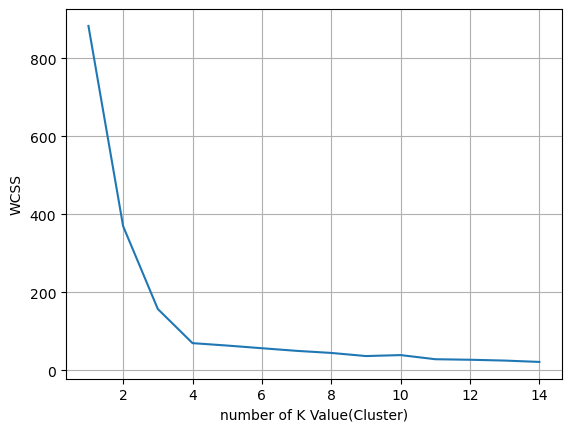

In [11]:
plt.plot(range(1,15),WCSS)
plt.xlabel("number of K Value(Cluster)")
plt.ylabel("WCSS")
plt.grid()
plt.show()

In [ ]:
# 9. Technikami podobnymi do pokazanych na lekcji, narysuj granice podziału obszarów odgadywanych przez model. 
# Do wykresu dodaj punkty z X oraz położenia centroidów:

In [12]:
kmeans = KMeans(n_clusters=4, max_iter=300, random_state=1, n_init='auto') #kmeans to model dzielacy zbiór na 5 grup
clusters = kmeans.fit_predict(X)#zbór punktów dzielimy na 4 grup i przecwiczymy model
labels  = kmeans.labels_#tablica ktora dla kazdej próbki przechowuje nr klastra lub grupy do ktorej probka została zakwalifikowana
centroids = kmeans.cluster_centers_#centralne punkty każdej grupy

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
#Rysowanie obszaru podziału wykonaj z dokładnością 0.1 (mniejsza wartość powoduje wolne rysowanie wykresu, bo będzie zbyt szczegółowy)

In [13]:
h=0.1

In [ ]:
#Wyznacz wartości x_min, x_max, y_min, y_max określające fragment płaszczyzny na którym zmieszczą się wszystkie punkty z X

In [ ]:
#Utwórz macierze xx i yy korzystając z funkcji meshgrid. wartości x mają się zmieniać od x_min do x_max z krokiem h. 
#Podobnie dla wartości y
#Dla każdego punktu wyznacz wynik predykcji modelu i zapisz go w zmiennej X. Podczas wywoływanie predykcji możesz "spłaszczyć" 
#dane z współrzędnych x i y korzystając z funkcji ravel(). Zmień kształt Z na taki sam jak ma xx

In [15]:
x_min, x_max = X[:,0].min(), X[:,0].max()
y_min, y_max = X[:,1].min(), X[:,1].max()
xx,yy=np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)

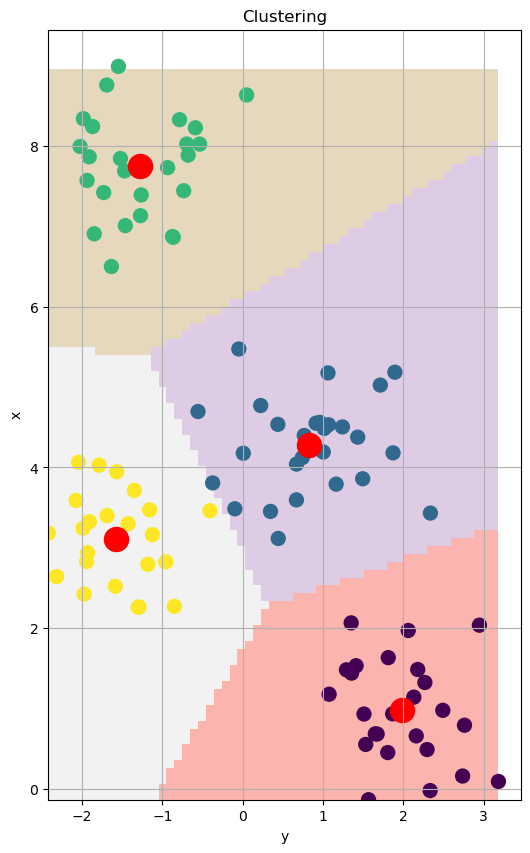

In [18]:
plt.figure(1 , figsize = (15 , 10) )
plt.clf()
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel1, origin='lower')
 
plt.scatter(x=X[:,0], y=X[:,1], c=labels, s=100)
 
plt.scatter(x=centroids[:,0], y=centroids[:,1],s=300 , c='red')
 
plt.ylabel('x') , plt.xlabel('y')
plt.grid()
plt.title("Clustering")
plt.show()

In [ ]:
#Oto wyjaśnienie każdej linii kodu:
#1. plt.figure(1, figsize=(15, 7))

#    Opis: Tworzy nową figurę (okno wykresu), która będzie wyświetlać wykres.
 #       1: Numer identyfikujący figurę. Można go użyć do odniesienia się do tego konkretnego wykresu, jeśli mamy więcej niż jeden.
  #      figsize=(15, 7): Ustawia rozmiar wykresu na 15 jednostek szerokości i 7 jednostek wysokości, co określa proporcje figury.

#2. plt.clf()

#    Opis: Czyści bieżącą figurę, usuwając wszelkie wcześniejsze dane, wykresy lub inne elementy, które mogły być już na niej wyświetlone. Zapewnia, że nowy wykres zaczyna się od "czystego" okna.

#3. plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Pastel1, origin='lower')

 #   plt.imshow(Z, ...): Wyświetla siatkę wartości jako obraz na wykresie.
  #      Z: Tablica zawierająca dane, które mają być wyświetlone (np. klasyfikacja punktów w przestrzeni 2D).
   #     interpolation='nearest': Ustawia sposób wyświetlania pikseli, tutaj bez interpolacji (piksele są prostokątne).
    #    extent=(xx.min(), xx.max(), yy.min(), yy.max()): Zakres wartości na osiach X i Y, ustawiony na minimalne i maksymalne wartości siatek xx i yy.
     #   cmap=plt.cm.Pastel1: Kolormap (paleta kolorów) ustawiona na pastelowe kolory, co sprawia, że regiony są delikatnie zabarwione.
      #  origin='lower': Początek układu współrzędnych umieszczony w lewym dolnym rogu, co odwzorowuje układ wartości na siatce.

#4. plt.scatter(x=X[:, 0], y=X[:, 1], c=labels, s=100)

#   plt.scatter: Tworzy wykres punktowy dla danych wejściowych X.
#      x=X[:, 0]: Wyciąga współrzędne X wszystkich punktów (pierwsza kolumna X).
#     y=X[:, 1]: Wyciąga współrzędne Y wszystkich punktów (druga kolumna X).
#     c=labels: Kolory punktów są określone przez etykiety klastrów (labels). Każdy klaster ma inny kolor.
#     s=100: Wielkość punktów ustawiona na 100 (większe niż domyślne).

#5. plt.scatter(x=centroids[:, 0], y=centroids[:, 1], s=300, c='red')

#    plt.scatter: Tworzy wykres punktowy dla centroidów klastrów.
#        x=centroids[:, 0]: Wyciąga współrzędne X centroidów (pierwsza kolumna centroids).
#        y=centroids[:, 1]: Wyciąga współrzędne Y centroidów (druga kolumna centroids).
#        s=300: Wielkość punktów centroidów jest ustawiona na 300 (większe niż punkty danych).
#        c='red': Kolor centroidów ustawiony na czerwony, aby były wyraźnie widoczne.

#6. plt.ylabel('x') , plt.xlabel('y')

#    Opis: Ustawia etykiety osi.
#      plt.ylabel('x'): Ustawia opis osi Y jako 'x'.
#      plt.xlabel('y'): Ustawia opis osi X jako 'y'.

#7. plt.grid()

#    Opis: Włącza siatkę na wykresie, co ułatwia odczytywanie współrzędnych punktów.

#8. plt.title("Clustering")

 #   Opis: Ustawia tytuł wykresu jako "Clustering", co pozwala lepiej zrozumieć, że wykres przedstawia wyniki klasteryzacji.

#9. plt.show()

 #   Opis: Wyświetla gotowy wykres. Renderuje wszystkie wcześniej zdefiniowane elementy i wyświetla je w oknie graficznym.

#Podsumowanie:

#Kod ten generuje wizualizację klasteryzacji:

 #   Siatka decyzyjna (za pomocą imshow) wyświetla podział przestrzeni na różne klastry.
 #   Punkty danych (scatter) są wyświetlane z różnymi kolorami zależnymi od etykiet klastrów.
 #   Centroidy klastrów są zaznaczone jako duże czerwone punkty.
